# Install Environment

In [95]:
!pip install numpy
!pip install pandas

In [96]:
import numpy as np
import pandas as pd

# Data Collection

In [97]:
data = pd.read_csv('/content/elephant.csv', encoding='latin-1')

In [98]:
data.head()

,name,year,month,weather changes,population,vegetation,location
0,agboo,2023.0,january,northeast-monsoon,734.0,53.0,614.0
1,agboo,2023.0,february,northeast-monsoon,932.0,61.0,615.0
2,agboo,2023.0,march,first inter-monsoon,1693.0,52.0,616.0
3,agboo,2023.0,april,first inter-monsoon,932.0,55.0,615.0
4,agboo,2023.0,may,southwest-monsoon,2363.0,85.0,612.0


In [99]:
data.describe()

,year,population,vegetation,location
count,2498.000000,2502.000000,2497.000000,2500.000000
mean,2016.345877,1396.288569,103.563076,625.276800
std,4.006061,808.042828,39.368331,12.635159
min,2009.000000,470.000000,52.000000,605.000000
25%,2013.000000,781.000000,67.000000,615.000000
50%,2016.000000,1264.000000,96.000000,623.000000
75%,2020.000000,1658.000000,139.000000,632.250000
max,2023.000000,3512.000000,178.000000,687.000000


In [100]:
def analzeData(data):
    print (data.shape)
    print (data.info)
    print (data.head())
    print(data.describe().transpose())

analzeData(data)

(2505, 7)
<bound method DataFrame.info of          name    year     month       weather changes  population  vegetation  \
0       agboo  2023.0   january     northeast-monsoon       734.0        53.0   
1       agboo  2023.0  february     northeast-monsoon       932.0        61.0   
2       agboo  2023.0     march   first inter-monsoon      1693.0        52.0   
3       agboo  2023.0     april   first inter-monsoon       932.0        55.0   
4       agboo  2023.0       may     southwest-monsoon      2363.0        85.0   
...       ...     ...       ...                   ...         ...         ...   
2500  rewatha  2009.0       NaN     southwest-monsoon      1309.0         NaN   
2501  rewatha  2009.0      july     southwest-monsoon      1658.0        68.0   
2502   gamunu  2009.0    august     southwest-monsoon      1020.0       146.0   
2503    agboo  2009.0       NaN                   NaN         NaN         NaN   
2504  rewatha     NaN   october  second inter-monsoon      1839.0  

In [101]:
data.isnull().sum()

name               0
year               7
month              6
weather changes    6
population         3
vegetation         8
location           5
dtype: int64

In [102]:
data = data.dropna()

In [103]:
data.isnull().sum()

name               0
year               0
month              0
weather changes    0
population         0
vegetation         0
location           0
dtype: int64

# Data Visulization

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

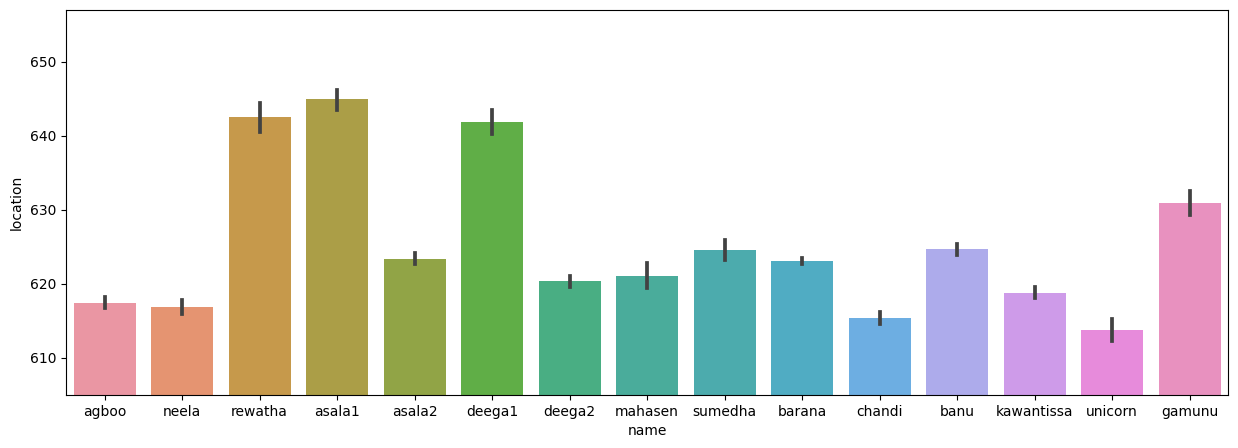

In [105]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='name', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

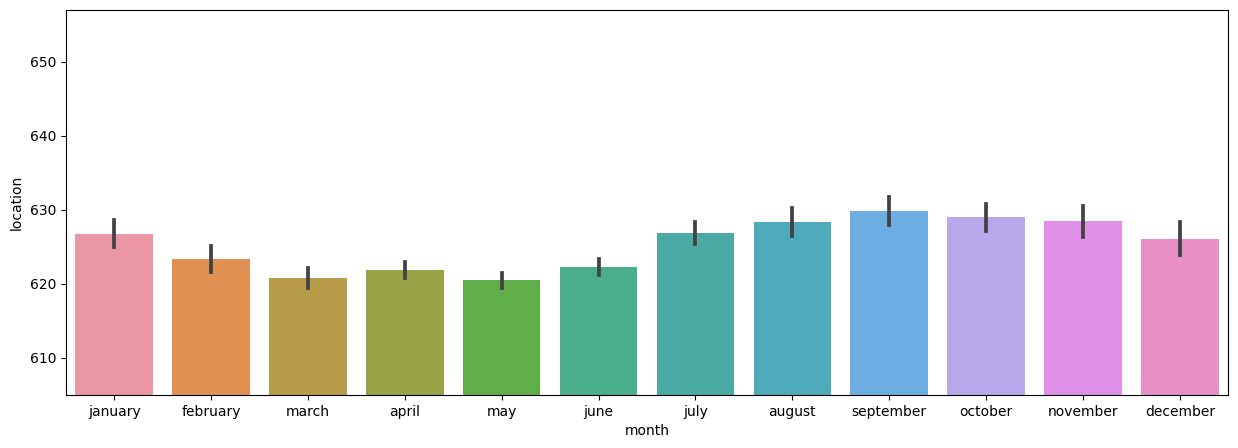

In [106]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='month', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

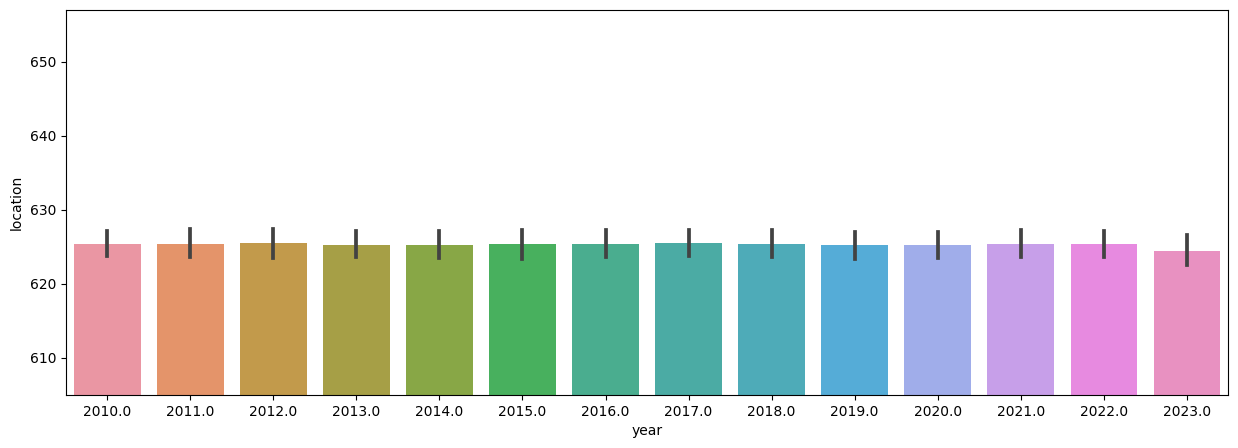

In [107]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x='year', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

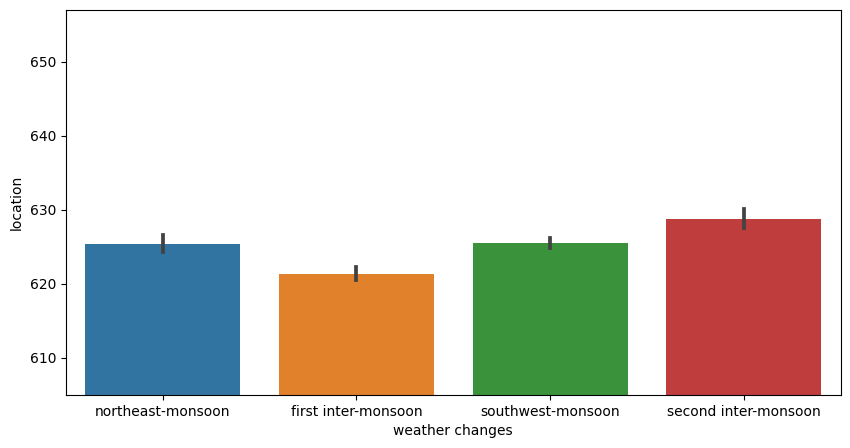

In [108]:
plot = plt.figure(figsize=(10,5))
sns.barplot(x='weather changes', y = 'location', data = data)

plt.ylim(605, 657)
plt.show()

In [109]:
data = data.drop(columns=['population', 'vegetation'])

In [110]:
data.head()

,name,year,month,weather changes,location
0,agboo,2023.0,january,northeast-monsoon,614.0
1,agboo,2023.0,february,northeast-monsoon,615.0
2,agboo,2023.0,march,first inter-monsoon,616.0
3,agboo,2023.0,april,first inter-monsoon,615.0
4,agboo,2023.0,may,southwest-monsoon,612.0


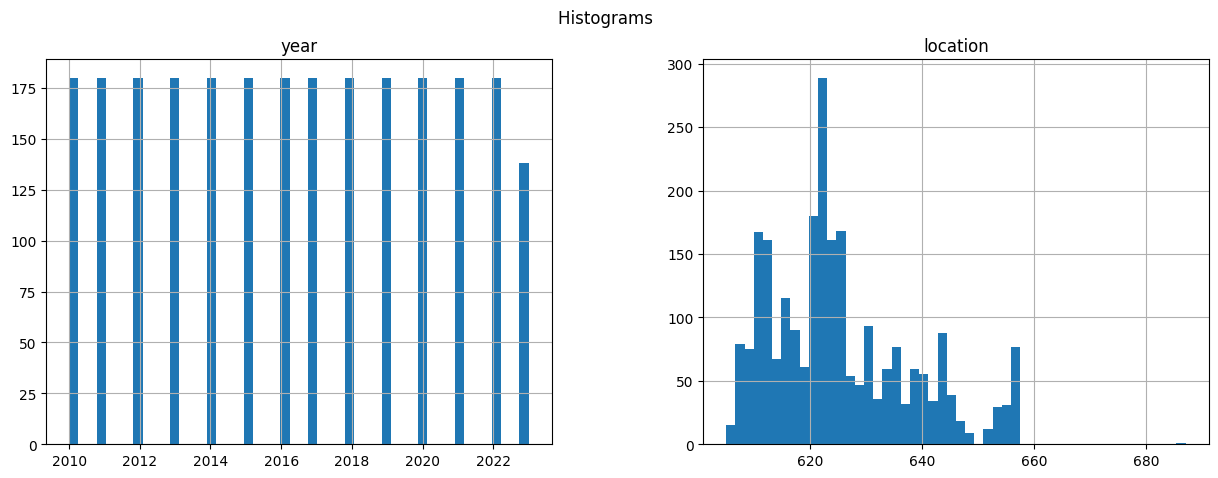

In [111]:
def visualize_data(data):

    data.hist(bins=50, figsize=(15, 5))
    plt.suptitle("Histograms ")
    plt.show()

visualize_data(data)

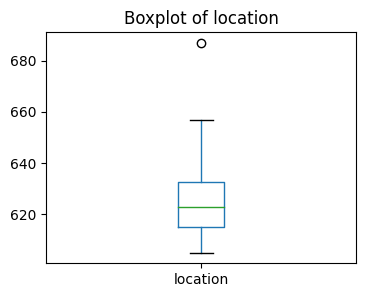

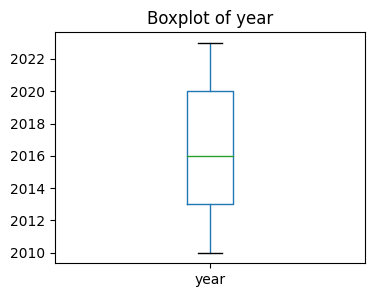

In [112]:
def plot_boxplot(df, ft, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.title(f"Boxplot of {ft}")
    plt.show()

plot_boxplot(data, "location", figsize=(4, 3))
plot_boxplot(data, "year", figsize=(4, 3))

In [113]:
def remove_outliers(data, column_name, threshold):
    """
    Remove outliers from a pandas dataframe based on a specified column and threshold.

    Parameters:
        df (pandas dataframe): The dataframe from which to remove outliers.
        column_name (str): The name of the column to check for outliers.
        threshold (float): The threshold for determining an outlier (e.g. 1.5 for 1.5 times the interquartile range).

    Returns:
        pandas dataframe: The dataframe with outliers removed.
    """
    # Calculate the column's mean and standard deviation
    mean = data[column_name].mean()
    std = data[column_name].std()

    # Calculate the lower and upper bounds for outliers
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Remove rows where the column value is outside the bounds
    data = data[(data[column_name] > lower_bound) & (data[column_name] < upper_bound)]

    return data

# Remove outliers from the 'Location" column a threshold of 1.5
data= remove_outliers(data, 'location', 1.5)

data.shape

(2247, 5)

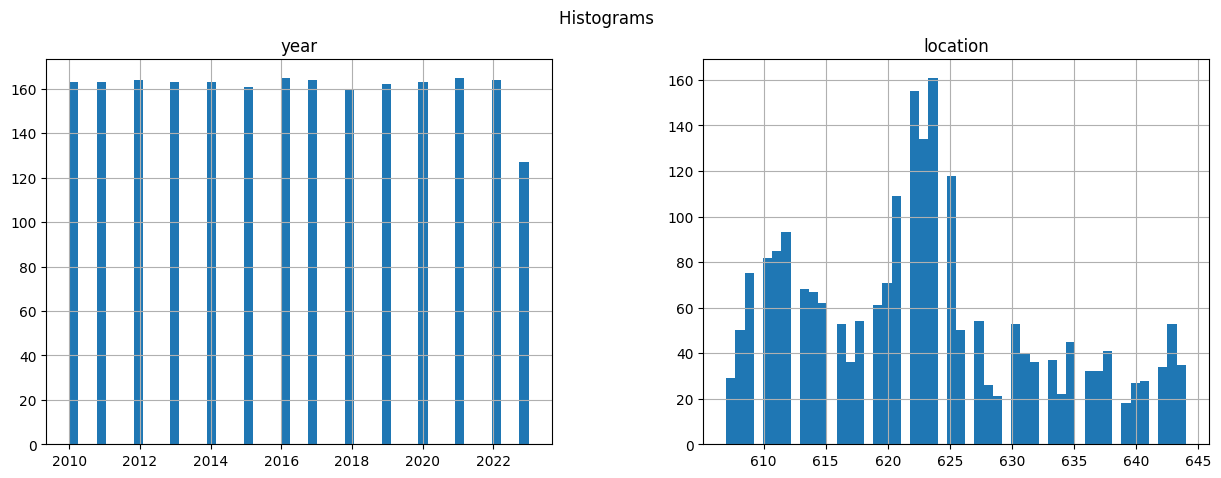

In [114]:
def visualize_data(data):

    data.hist(bins=50, figsize=(15, 5))
    plt.suptitle("Histograms ")
    plt.show()

visualize_data(data)

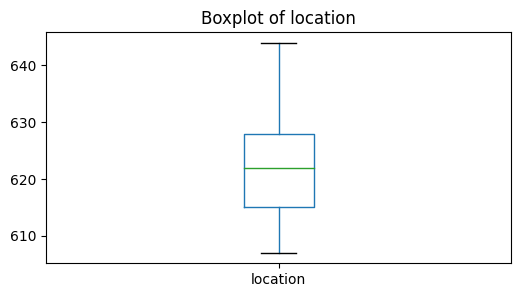

In [115]:
def plot_boxplot(df, ft, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.title(f"Boxplot of {ft}")
    plt.show()

plot_boxplot(data, "location", figsize=(6, 3))

In [116]:
data.shape

(2247, 5)

In [117]:
data.head()

,name,year,month,weather changes,location
0,agboo,2023.0,january,northeast-monsoon,614.0
1,agboo,2023.0,february,northeast-monsoon,615.0
2,agboo,2023.0,march,first inter-monsoon,616.0
3,agboo,2023.0,april,first inter-monsoon,615.0
4,agboo,2023.0,may,southwest-monsoon,612.0


In [118]:
data = pd.get_dummies(data, columns=['name', 'month', 'weather changes'])

In [119]:
data.head()

,year,location,name_agboo,name_asala1,name_asala2,name_banu,name_barana,name_chandi,name_deega1,name_deega2,...,month_june,month_march,month_may,month_november,month_october,month_september,weather changes_first inter-monsoon,weather changes_northeast-monsoon,weather changes_second inter-monsoon,weather changes_southwest-monsoon
0,2023.0,614.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023.0,615.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2023.0,616.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2023.0,615.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2023.0,612.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Model Building

In [120]:
!pip install sklearn

In [121]:
X = data.drop('location', axis=1)
y = data['location']

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def model_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lr = LinearRegression()
lr_accuracy = model_accuracy(lr, X_train, y_train, X_test, y_test)
print(f"Linear Regression - Accuracy: {lr_accuracy}")

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt_accuracy = model_accuracy(dt, X_train, y_train, X_test, y_test)
print(f"Decision Tree Regressor - Accuracy: {dt_accuracy}")

# Random Forest Regressor
rf = RandomForestRegressor()
rf_accuracy = model_accuracy(rf, X_train, y_train, X_test, y_test)
print(f"Random Forest Regressor - Accuracy: {rf_accuracy}")


Linear Regression - Accuracy: 0.4882314713096588
Decision Tree Regressor - Accuracy: 0.9727401639609241
Random Forest Regressor - Accuracy: 0.9826669305461024


# Hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def train_random_forest(X_train, y_train, X_test, y_test):
    parameters = {
        'n_estimators': [10, 50, 100],
        'criterion': ['squared_error', 'absolute_error', 'poisson']
    }

    # Initialize your random forest model (rf) here
    rf = RandomForestRegressor()

    grid_obj = GridSearchCV(estimator=rf, param_grid=parameters, scoring='r2', cv=5, n_jobs=-1)

    try:
        grid_fit = grid_obj.fit(X_train, y_train)
        best_model = grid_fit.best_estimator_

        # Display the best hyperparameters
        print("Best Hyperparameters:", grid_fit.best_params_)

        r2_score = best_model.score(X_test, y_test)
        return best_model, r2_score
    except Exception as e:
        print("Error:", str(e))
        return None, None

best_model, test_r2_score = train_random_forest(X_train, y_train, X_test, y_test)

if best_model is not None:
    print("Test Tuning Score:", test_r2_score)
else:
    print("Unable to train the model due to an error.")

Best Hyperparameters: {'criterion': 'absolute_error', 'n_estimators': 100}
Test Tuning Score: 0.9830026792672784


# Export Pickle File

In [124]:
import pickle
with open('Elephant_Location.pickle', 'wb') as file:
    pickle.dump(best_model, file)

# Test the Model

In [125]:
X_test.columns

Index(['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon'],
      dtype='object')

In [126]:
best_model.predict([[2013, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([625.11])

In [127]:
column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

prediction_data = pd.DataFrame([[2013, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], columns=column_names)

prediction = best_model.predict(prediction_data)
rounded_prediction = int(prediction)

print("Grama Niladhari Division:", rounded_prediction)


Grama Niladhari Division: 625


In [128]:
import pickle

# Load the trained model
with open('Elephant_Location.pickle', 'rb') as file:
    best_model = pickle.load(file)

column_names = ['year', 'name_agboo', 'name_asala1', 'name_asala2', 'name_banu',
       'name_barana', 'name_chandi', 'name_deega1', 'name_deega2',
       'name_gamunu', 'name_kawantissa', 'name_mahasen', 'name_neela',
       'name_rewatha', 'name_sumedha', 'name_unicorn', 'month_april',
       'month_august', 'month_december', 'month_february', 'month_january',
       'month_july', 'month_june', 'month_march', 'month_may',
       'month_november', 'month_october', 'month_september',
       'weather changes_first inter-monsoon',
       'weather changes_northeast-monsoon',
       'weather changes_second inter-monsoon',
       'weather changes_southwest-monsoon']

prediction_data = pd.DataFrame([[2013, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], columns=column_names)

prediction = best_model.predict(prediction_data)
rounded_prediction = int(prediction)
print("Grama Niladhari Division:", rounded_prediction)

location_mapping = {
    605: 'Nawakkulama',
    606: 'Moragoda',
    607: 'Keeriyagaswewa',
    608: 'Mahadivulwewa',
    609: 'Heenukkiriyawa',
    610: 'Ganewalpola',
    611: 'Mainiya Rambewa',
    612: 'Kollankuttigama',
    613: 'Maminiyawa',
    614: 'Thoruwewa',
    615: 'Kele Puliyankulama',
    616: 'Ihala Puliyankulama',
    617: 'Maradankadawala',
    618: 'Olukaranda',
    619: 'Mudaperumagama',
    620: 'Dumriya Nagaraya',
    621: 'Ihalagama',
    622: 'Shasthrawelliya',
    623: 'Karukkankulama',
    624: 'Mailagaswewa',
    625: 'Neekiniyawa',
    626: 'Malawa',
    627: 'Maradankadawala Road',
    628: 'Kekirawa Town',
    629: 'Kuda Kekirawa',
    630: 'Mankadawala',
    631: 'Maldenipura',
    632: 'Embulgaswewa',
    633: 'Medawewa',
    634: 'Pothanegama',
    635: 'Kumbukwewa',
    636: 'Rathmalkanda',
    637: 'Maha Kekirawa',
    638: 'Olombewa',
    639: 'Korasagalla',
    640: 'Medagama',
    641: 'Maha Elagamuwa',
    642: 'Pallehingura',
    643: 'Unagollewa',
    644: 'Horapola',
    645: 'Nidigama',
    646: 'Barawila',
    647: 'Murungahitikanda',
    648: 'Kotagala',
    649: 'Nelbegama',
    650: 'Madatugama',
    651: 'Kandalama East',
    652: 'Kithulhitiyawa',
    653: 'Kandalama West',
    654: 'Dunumandalawa',
    655: 'Bandarapothana',
    656: 'Undurawa',
    657: 'Dambewatana'
}

predicted_location_name = location_mapping.get(rounded_prediction, 'Unknown')
print("Elephant Located Area:", predicted_location_name)


Grama Niladhari Division: 625
Elephant Located Area: Neekiniyawa
